<a href="https://colab.research.google.com/github/MongiBESBES/Energy/blob/main/Analyse_1015.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving SCB1700-1950.xlsx to SCB1700-1950.xlsx


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

In [ ]:
# Chargez les données depuis le fichier Excel
file_path = '/content/SCB1700-1950.xlsx'
df = pd.read_excel(file_path)

# Supposons que la colonne contenant les dates s'appelle "date"
colonne_date = df["Year"]

# Convertir la colonne "Date" en chaînes de caractères avec le format '%Y'
colonne_date_formattee = colonne_date.astype(str).str.zfill(4)

colonne_be = df["Spot"]

In [ ]:
df["Spot"]

0        8.3
1       18.3
2       26.7
3       38.3
4       60.0
       ...  
246    154.3
247    214.7
248    193.0
249    190.7
250    118.9
Name: Spot, Length: 251, dtype: float64

In [ ]:
# Choisissez la colonne 'Spot' comme variable cible
target_column = 'Spot'
Spot_values = df[target_column].values.reshape(-1, 1)

# Normalisez les valeurs entre 0 et 1
scaler = MinMaxScaler(feature_range=(0, 1))
Spot_scaled = scaler.fit_transform(Spot_values)

# Créez la série temporelle avec des séquences d'entrée et de sortie
def create_time_series(data, look_back=1):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

In [ ]:
Spot_scaled

array([[0.03225806],
       [0.0711232 ],
       [0.10376992],
       [0.14885348],
       [0.23319083],
       [0.37582588],
       [0.18771862],
       [0.12942091],
       [0.06490478],
       [0.05169063],
       [0.01943257],
       [0.        ],
       [0.        ],
       [0.0128255 ],
       [0.0711232 ],
       [0.17489312],
       [0.30431403],
       [0.40808395],
       [0.38865138],
       [0.2526234 ],
       [0.18150019],
       [0.16828605],
       [0.14263506],
       [0.0711232 ],
       [0.13602798],
       [0.25923047],
       [0.50524679],
       [0.79012825],
       [0.66731442],
       [0.47298873],
       [0.30431403],
       [0.22658375],
       [0.0711232 ],
       [0.03225806],
       [0.10376992],
       [0.22036533],
       [0.45355616],
       [0.52467936],
       [0.71900505],
       [0.65410027],
       [0.47298873],
       [0.25923047],
       [0.12942091],
       [0.10376992],
       [0.03225806],
       [0.0711232 ],
       [0.14263506],
       [0.259

In [ ]:
# Définissez la taille de la fenêtre temporelle (look_back)
look_back = 30

# Créez la série temporelle
X, y = create_time_series(Spot_scaled, look_back)

# Divisez les données en ensembles d'entraînement, de validation et de test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

# Reshapez pour le format d'entrée GRU (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [ ]:
# Model LSTM
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Reshape pour le format d'entrée LSTM (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Entraîner le modèle
model.fit(X_train, y_train, epochs=50, batch_size=1, verbose=2)

Epoch 1/50
176/176 - 3s - loss: 0.0534 - 3s/epoch - 19ms/step
Epoch 2/50
176/176 - 1s - loss: 0.0465 - 1s/epoch - 8ms/step
Epoch 3/50
176/176 - 1s - loss: 0.0271 - 1s/epoch - 8ms/step
Epoch 4/50
176/176 - 1s - loss: 0.0190 - 1s/epoch - 8ms/step
Epoch 5/50
176/176 - 1s - loss: 0.0171 - 1s/epoch - 8ms/step
Epoch 6/50
176/176 - 1s - loss: 0.0156 - 1s/epoch - 8ms/step
Epoch 7/50
176/176 - 2s - loss: 0.0145 - 2s/epoch - 10ms/step
Epoch 8/50
176/176 - 2s - loss: 0.0133 - 2s/epoch - 9ms/step
Epoch 9/50
176/176 - 1s - loss: 0.0124 - 1s/epoch - 8ms/step
Epoch 10/50
176/176 - 1s - loss: 0.0118 - 1s/epoch - 8ms/step
Epoch 11/50
176/176 - 1s - loss: 0.0113 - 1s/epoch - 8ms/step
Epoch 12/50
176/176 - 1s - loss: 0.0108 - 1s/epoch - 8ms/step
Epoch 13/50
176/176 - 1s - loss: 0.0101 - 1s/epoch - 8ms/step
Epoch 14/50
176/176 - 1s - loss: 0.0097 - 1s/epoch - 8ms/step
Epoch 15/50
176/176 - 2s - loss: 0.0094 - 2s/epoch - 9ms/step
Epoch 16/50
176/176 - 2s - loss: 0.0089 - 2s/epoch - 10ms/step
Epoch 17/50
17

In [ ]:
# Effectuez des prédictions sur les données de test
test_predict = model.predict(X_test)
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

1/1 [==============================] - 1s 578ms/step


In [ ]:
# Récupérez les dates correspondant aux données de test
test_dates = df.index[-len(y_test):]+1700

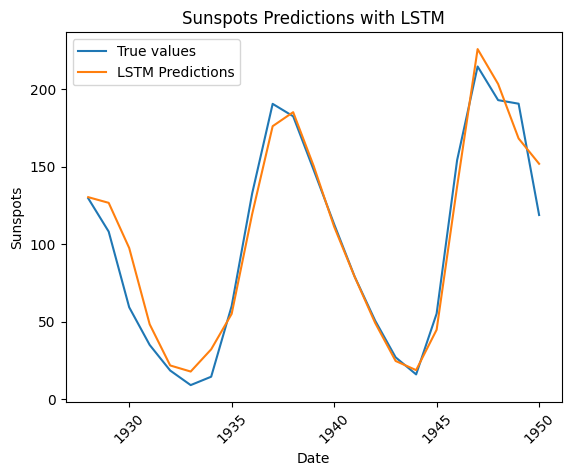

In [ ]:
plt.plot(test_dates, y_test, label='True values')
plt.plot(test_dates, test_predict, label='LSTM Predictions')
plt.title('Sunspots Predictions with LSTM')
plt.xlabel('Year')
plt.ylabel('Sunspots')
plt.legend()
plt.xticks(rotation=45)  # Rotation des étiquettes de l'axe des x pour une meilleure lisibilité
plt.show()


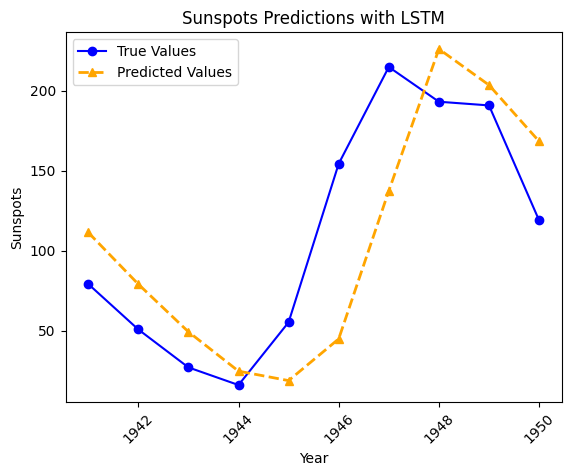

In [ ]:
def plot_random_predictions(test_dates, y_test, test_predict):
    # Sélectionner une date aléatoire 11 jours avant la fin des dates de test
    random_date_index = len(test_dates) - 11
    random_date = test_dates[random_date_index]

    # Trouver l'index de la date aléatoire dans les dates de test
    random_date_index_test = np.where(test_dates == random_date)[0][0]

    # Extraire les 10 valeurs réelles qui suivent la date aléatoire
    y_test_values = y_test[random_date_index_test + 1:random_date_index_test + 11]

    # Extraire les valeurs prédites associées (en ajustant l'indice)
    test_predict_values = test_predict[random_date_index_test:random_date_index_test + 10]

    # Déballer la dimension supplémentaire dans test_predict_values
    test_predict_values = np.squeeze(test_predict_values, axis=-1)

    # Plot des résultats
    plt.plot(test_dates[random_date_index_test + 1:random_date_index_test + 11], y_test_values,
             label='True Values', color='blue', marker='o')
    plt.plot(test_dates[random_date_index_test + 1:random_date_index_test + 11], test_predict_values,
             label='Predicted Values', color='orange', linestyle='dashed', marker='^',linewidth=2)

    plt.title('Sunspots Predictions with LSTM')
    plt.xlabel('Year')
    plt.ylabel('Sunspots')
    plt.legend()

    # Rotation des étiquettes de l'axe des x
    plt.xticks(rotation=45)

    plt.show()

# Utilisation de la fonction
plot_random_predictions(test_dates, y_test, test_predict)


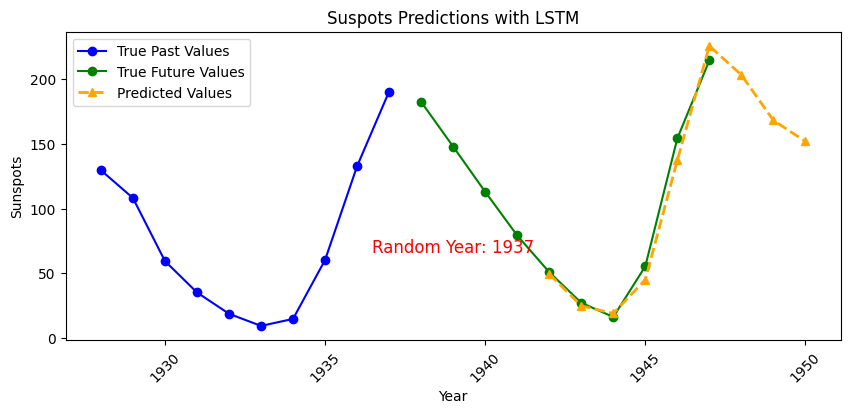

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_random_predictions(test_dates, y_test, test_predict, random_seed=None):
    if random_seed is not None:
        np.random.seed(random_seed)

    # Sélectionner une date aléatoire 35 jours avant la fin des dates de test
    random_date_index = np.random.choice(len(test_dates) - 11, size=1)[0]
    random_date = test_dates[random_date_index]

    # Trouver l'index de la date aléatoire dans les dates de test
    random_date_index_test = np.where(test_dates == random_date)[0][0]

    # Extraire les 10 valeurs réelles qui suivent la date aléatoire (True past values + True future values)
    true_past_values = y_test[random_date_index_test - 9:random_date_index_test + 1]
    true_future_values = y_test[random_date_index_test + 1:random_date_index_test + 11]

    # Extraire les 10 valeurs prédites associées (True future values + 5 valeurs prédites avant + 5 valeurs prédites après)
    test_predict_values = test_predict[random_date_index_test +5:random_date_index_test + 16]

    # Déballer la dimension supplémentaire dans test_predict_values
    test_predict_values = np.squeeze(test_predict_values, axis=-1)


    # Créer une nouvelle figure avec une taille personnalisée (par exemple, largeur=12, hauteur=6)
    plt.figure(figsize=(10, 4))


    # Plot des résultats
    plt.plot(test_dates[random_date_index_test - 9:random_date_index_test + 1], true_past_values,
             label='True Past Values', color='blue', marker='o')
    plt.plot(test_dates[random_date_index_test + 1:random_date_index_test + 11], true_future_values,
             label='True Future Values', color='green', marker='o')
    plt.plot(test_dates[random_date_index_test +5:random_date_index_test + 16], test_predict_values,
             label='Predicted Values', color='orange', linestyle='dashed', linewidth=2, marker='^')


    # Ajouter une annotation en bas de la figure
    plt.annotate(f'Random Year: {random_date}', xy=(0.5, 0.3), xytext=(0.5, 0.3), xycoords='axes fraction',
             textcoords='axes fraction', ha='center', va='center', fontsize=12, color='red',
             #arrowprops=dict(arrowstyle='-|>', connectionstyle='arc3', color='blue')
             )




    plt.title('Suspots Predictions with LSTM')
    plt.xlabel('Year')
    plt.ylabel('Sunspots')
    plt.legend()

    # Rotation des étiquettes de l'axe des x
    plt.xticks(rotation=45)

    plt.show()

# Utilisation de la fonction
plot_random_predictions(test_dates, y_test, test_predict)


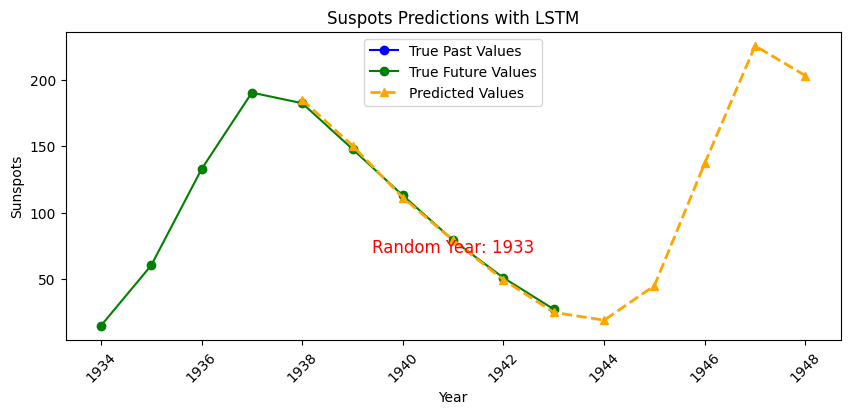

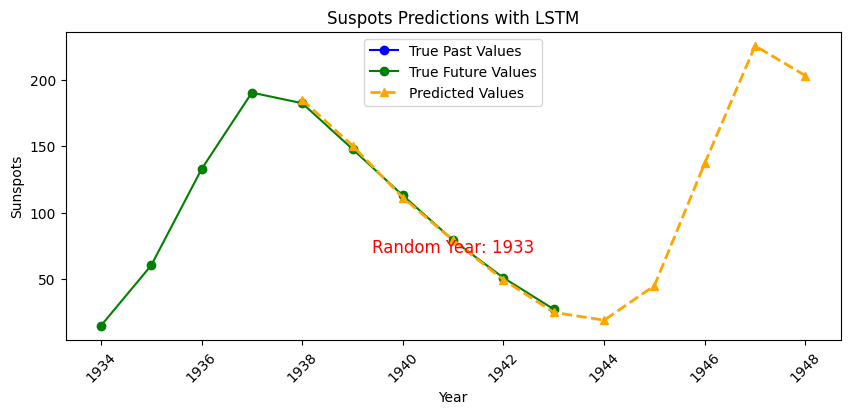

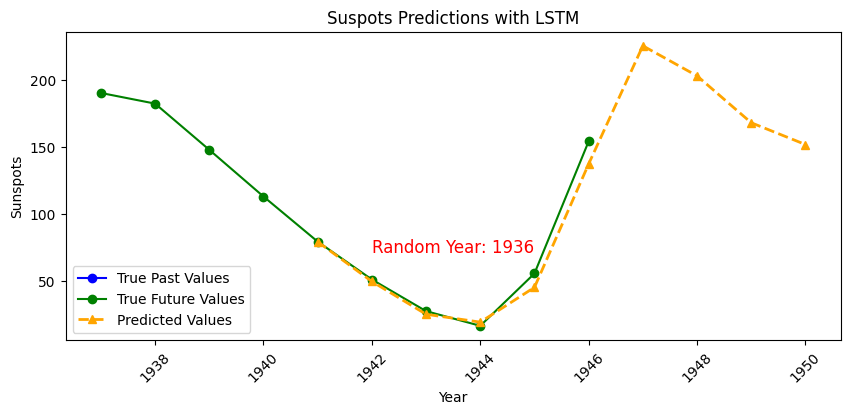

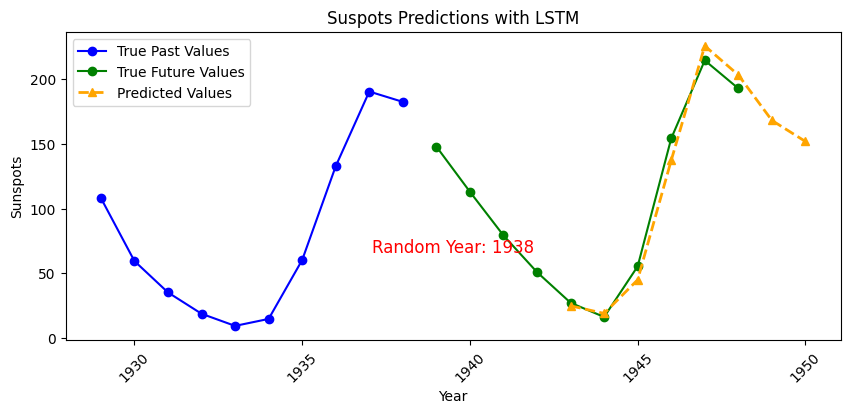

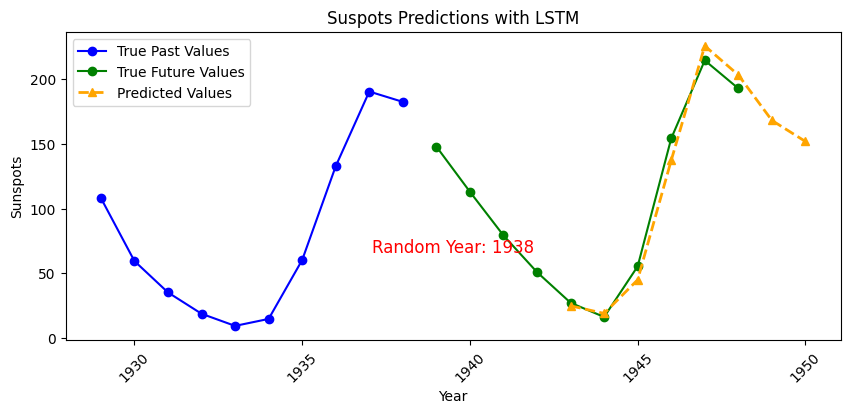

In [ ]:
# Utilisation de la fonction plusieurs fois avec différentes dates aléatoires
for i in range(5):
    plot_random_predictions(test_dates, y_test, test_predict, random_seed=i)